<a href="https://www.kaggle.com/code/ankumagawa/everything-you-can-do-with-unsupervised-clustering?scriptVersionId=93064315" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-ratio1/Medical Ratio.csv
/kaggle/input/pharma-patents/37 FIRMS-SUBCLASS IPC.csv


# TABLE OF CONTENT:

- # <a href='#1'>I. Objection: </a>
- # <a href='#1'> II. Import Library: </a>
- # <a href='#1'> III. Import Data: </a>
- # <a href='#1'> IV.K-means cluster: elbow method : </a>
- # <a href='#1'> V. Agglomerative Hierarchical clustering: </a>
- # <a href='#1'> DBSCAN clustering algorithm: </a>
- # <a href='#1'>  Gaussian Mixture Model (GMM): </a>

# <a id='1'># I. Objection: </a>

Our sample is 37 japanese pharmaceutical companies and their total number of patent application that is classified in different patent subclass. 

Each columns is each Patent subclass (sub IPC). The total number of subclass in our sample is 272. The range of subclass in the sample run from A01C to H05K


Our mission in this project is we would like to group the companies to different clusters based on the similarity of the technology they operating. The sub IPC represents the specific technology companies have been focusing on. 

In other words, we will use different clusters algorithm in ML to group the companies based on the their sub-IPC perforamnce.
 
The clusterning algorithm we will use in this project are:

* K-means cluster: elbow method

* K-means cluster: Silhouette Method

* Agglomerative Hierarchical clustering

* DBSCAN clustering algorithm

* Gaussian Mixture Model (GMM)




# <a id='1'>  II. Import Library:</a>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline

- # <a href='#1'> III. Import Data: </a>

In [3]:
df=pd.read_csv('../input/pharma-patents/37 FIRMS-SUBCLASS IPC.csv')
pd.set_option('display.max_columns', None)
df

,COMPANY,A01C,A01G,A01H,A01K,A01M,A01N,A01P,A21D,A23B,A23C,A23D,A23F,A23G,A23J,A23K,A23L,A23P,A24B,A24F,A41D,A44B,A45B,A45C,A45D,A47C,A47F,A47G,A47K,A47L,A61B,A61C,A61D,A61F,A61G,A61H,A61J,A61K,A61L,A61M,A61N,A61P,A61Q,A62B,A62D,A63B,A63F,B01D,B01F,B01J,B01L,B02C,B03B,B03C,B04B,B04C,B05B,B05C,B05D,B06B,B07B,B07C,B08B,B09B,B21D,B23K,B23P,B24B,B24D,B25H,B25J,B26D,B26F,B27K,B27N,B28B,B29B,B29C,B29D,B29K,B29L,B30B,B31B,B32B,B33Y,B41F,B41J,B41K,B41M,B43K,B43M,B60C,B60J,B60K,B60N,B60R,B63B,B64D,B65B,B65C,B65D,B65G,B65H,B66B,B66F,B67B,B67C,B67D,B81B,B81C,B82Y,C01B,C01D,C01F,C01G,C02F,C03B,C03C,C04B,C05B,C05D,C05G,C06B,C06D,C07B,C07C,C07D,C07H,C07K,C07M,C08B,C08C,C08F,C08G,C08H,C08J,C08K,C08L,C09B,C09C,C09D,C09F,C09J,C09K,C10B,C10G,C10L,C10M,C10N,C11B,C11C,C11D,C12C,C12F,C12G,C12H,C12J,C12M,C12N,C12P,C12Q,C12R,C13B,C22B,C22C,C23C,C23F,C25B,C25D,C25F,C30B,C40B,C01F.1,C02G,C03D,C04B.1,D04C,D04H,D06M,D06P,D21B,D21C,D21H,E01B,E02B,E04B,E04C,E04F,E04H,E06B,E06C,F21B,F01N,F15B,F16B,F16C,F16D,F16F,F16K,F17C,F21S,F21V,F21Y,F23J,F23Q,F24F,F26B,F28D,G01B,G01D,G01F,C01G.1,G01H,G01J,G01M,G01P,G01R,G01V,G02B,G02C,G02F,G03B,G03C,G03F,G03G,G04F,G05B,G05F,G06G,C06K,G06M,G06N,G06Q,C07F,G07G,G08B,C08G.1,G09B,G09F,C09G,G11B,G11C,G16B,G16C,G16H,G21F,G21G,G21K,H01B,H01F,H01G,H01H,H01J,H01L,H01M,H01Q,H01R,H01S,H01T,H02H,H02J,H02K,H02M,H02N,H03L,H03M,H04B,H04L,H04N,H04R,H04W,H05B,H05K,SUM
0,ASKA PHARMA HOLDINGS,0,0,0,0,1,9,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,461,3,1,0,833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1323
1,ASTELLAS PHARMA INC,0,0,0,21,0,32,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,17,4707,18,8,0,3800,3,0,0,1,4,5,0,5,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,74,7,0,0,0,0,0,0,0,0,0,2,0,0,5,3,0,0,0,0,0,0,0,0,6,5,0,0,5,0,2,0,0,1,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,3,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,2,0,0,2,0,2,0,0,0,0,0,2,0,0,0,0,9,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,8805
2,BIOFERMIN PHARMA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,0,0,0,78,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192
3,CHUGAI PHARMA,1,0,0,67,25,63,2,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,2,1,0,25,2261,24,13,0,2354,4,0,0,0,0,20,5,18,0,0,0,0,0,0,7,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,1,16,0,1,1,2,5,23,0,0,3,0,0,0,1,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,12,1,1,6,0,0,0,0,0,0,0,0,0,0,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,1,2,0,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,5142
4,DAIICHI SANKYO CO LTD,0,1,0,15,0,31,4,0,0,0,0,0,0,0,4,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,2,25,6073,38,7,4,6105,57,0,0,0,0,12,5,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,41,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,67,0,0,0,0,6,2,0,0,8,

In [4]:
COMPANY =df['COMPANY']

In [5]:
#drop irrelevant features:
df.drop(columns=['COMPANY','SUM'],inplace=True)
df

,A01C,A01G,A01H,A01K,A01M,A01N,A01P,A21D,A23B,A23C,A23D,A23F,A23G,A23J,A23K,A23L,A23P,A24B,A24F,A41D,A44B,A45B,A45C,A45D,A47C,A47F,A47G,A47K,A47L,A61B,A61C,A61D,A61F,A61G,A61H,A61J,A61K,A61L,A61M,A61N,A61P,A61Q,A62B,A62D,A63B,A63F,B01D,B01F,B01J,B01L,B02C,B03B,B03C,B04B,B04C,B05B,B05C,B05D,B06B,B07B,B07C,B08B,B09B,B21D,B23K,B23P,B24B,B24D,B25H,B25J,B26D,B26F,B27K,B27N,B28B,B29B,B29C,B29D,B29K,B29L,B30B,B31B,B32B,B33Y,B41F,B41J,B41K,B41M,B43K,B43M,B60C,B60J,B60K,B60N,B60R,B63B,B64D,B65B,B65C,B65D,B65G,B65H,B66B,B66F,B67B,B67C,B67D,B81B,B81C,B82Y,C01B,C01D,C01F,C01G,C02F,C03B,C03C,C04B,C05B,C05D,C05G,C06B,C06D,C07B,C07C,C07D,C07H,C07K,C07M,C08B,C08C,C08F,C08G,C08H,C08J,C08K,C08L,C09B,C09C,C09D,C09F,C09J,C09K,C10B,C10G,C10L,C10M,C10N,C11B,C11C,C11D,C12C,C12F,C12G,C12H,C12J,C12M,C12N,C12P,C12Q,C12R,C13B,C22B,C22C,C23C,C23F,C25B,C25D,C25F,C30B,C40B,C01F.1,C02G,C03D,C04B.1,D04C,D04H,D06M,D06P,D21B,D21C,D21H,E01B,E02B,E04B,E04C,E04F,E04H,E06B,E06C,F21B,F01N,F15B,F16B,F16C,F16D,F16F,F16K,F17C,F21S,F21V,F21Y,F23J,F23Q,F24F,F26B,F28D,G01B,G01D,G01F,C01G.1,G01H,G01J,G01M,G01P,G01R,G01V,G02B,G02C,G02F,G03B,G03C,G03F,G03G,G04F,G05B,G05F,G06G,C06K,G06M,G06N,G06Q,C07F,G07G,G08B,C08G.1,G09B,G09F,C09G,G11B,G11C,G16B,G16C,G16H,G21F,G21G,G21K,H01B,H01F,H01G,H01H,H01J,H01L,H01M,H01Q,H01R,H01S,H01T,H02H,H02J,H02K,H02M,H02N,H03L,H03M,H04B,H04L,H04N,H04R,H04W,H05B,H05K
0,0,0,0,0,1,9,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,461,3,1,0,833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,21,0,32,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,17,4707,18,8,0,3800,3,0,0,1,4,5,0,5,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,74,7,0,0,0,0,0,0,0,0,0,2,0,0,5,3,0,0,0,0,0,0,0,0,6,5,0,0,5,0,2,0,0,1,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,3,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,2,0,0,2,0,2,0,0,0,0,0,2,0,0,0,0,9,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,0,0,0,78,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,67,25,63,2,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,2,1,0,25,2261,24,13,0,2354,4,0,0,0,0,20,5,18,0,0,0,0,0,0,7,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,1,16,0,1,1,2,5,23,0,0,3,0,0,0,1,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,12,1,1,6,0,0,0,0,0,0,0,0,0,0,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,1,2,0,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0
4,0,1,0,15,0,31,4,0,0,0,0,0,0,0,4,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,2,25,6073,38,7,4,6105,57,0,0,0,0,12,5,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,41,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,67,0,0,0,0,6,2,0,0,8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,2,10,1,0,1,3,0,0,0,1,1,0,39,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0

In [6]:
df.shape

(37, 272)

In [7]:
df.describe()

,A01C,A01G,A01H,A01K,A01M,A01N,A01P,A21D,A23B,A23C,A23D,A23F,A23G,A23J,A23K,A23L,A23P,A24B,A24F,A41D,A44B,A45B,A45C,A45D,A47C,A47F,A47G,A47K,A47L,A61B,A61C,A61D,A61F,A61G,A61H,A61J,A61K,A61L,A61M,A61N,A61P,A61Q,A62B,A62D,A63B,A63F,B01D,B01F,B01J,B01L,B02C,B03B,B03C,B04B,B04C,B05B,B05C,B05D,B06B,B07B,B07C,B08B,B09B,B21D,B23K,B23P,B24B,B24D,B25H,B25J,B26D,B26F,B27K,B27N,B28B,B29B,B29C,B29D,B29K,B29L,B30B,B31B,B32B,B33Y,B41F,B41J,B41K,B41M,B43K,B43M,B60C,B60J,B60K,B60N,B60R,B63B,B64D,B65B,B65C,B65D,B65G,B65H,B66B,B66F,B67B,B67C,B67D,B81B,B81C,B82Y,C01B,C01D,C01F,C01G,C02F,C03B,C03C,C04B,C05B,C05D,C05G,C06B,C06D,C07B,C07C,C07D,C07H,C07K,C07M,C08B,C08C,C08F,C08G,C08H,C08J,C08K,C08L,C09B,C09C,C09D,C09F,C09J,C09K,C10B,C10G,C10L,C10M,C10N,C11B,C11C,C11D,C12C,C12F,C12G,C12H,C12J,C12M,C12N,C12P,C12Q,C12R,C13B,C22B,C22C,C23C,C23F,C25B,C25D,C25F,C30B,C40B,C01F.1,C02G,C03D,C04B.1,D04C,D04H,D06M,D06P,D21B,D21C,D21H,E01B,E02B,E04B,E04C,E04F,E04H,E06B,E06C,F21B,F01N,F15B,F16B,F16C,F16D,F16F,F16K,F17C,F21S,F21V,F21Y,F23J,F23Q,F24F,F26B,F28D,G01B,G01D,G01F,C01G.1,G01H,G01J,G01M,G01P,G01R,G01V,G02B,G02C,G02F,G03B,G03C,G03F,G03G,G04F,G05B,G05F,G06G,C06K,G06M,G06N,G06Q,C07F,G07G,G08B,C08G.1,G09B,G09F,C09G,G11B,G11C,G16B,G16C,G16H,G21F,G21G,G21K,H01B,H01F,H01G,H01H,H01J,H01L,H01M,H01Q,H01R,H01S,H01T,H02H,H02J,H02K,H02M,H02N,H03L,H03M,H04B,H04L,H04N,H04R,H04W,H05B,H05K
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000

#  <a href='#1'>  IV. K-means Clusters: Elbow Method </a>

It is the simplest and commonly used iterative type unsupervised learning algorithm. In this, we randomly initialize the K number of centroids in the data (the number of k is found using the Elbow method which will be discussed later in this article ) and iterates these centroids until no change happens to the position of the centroid. Let’s go through the steps involved in K means clustering for a better understanding.

1) Select the number of clusters for the dataset ( K )

2) Select K number of centroids

3) By calculating the Euclidean distance or Manhattan distance assign the points to the nearest centroid, thus creating K groups

4) Now find the original centroid in each group

5) Again reassign the whole data point based on this new centroid, then repeat step 4 until the position of the centroid doesn’t change.

Finding the optimal number of clusters is an important part of this algorithm. A commonly used method for finding optimal K value is Elbow Method.

In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ).

As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape.

The K value corresponding to this point is the optimal K value or an optimal number of clusters

But before applying **Elbow method**, we have to normalize the data so that the scale of each variable is the same. 

Why is this important?  If the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude.

In [8]:
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,A01C,A01G,A01H,A01K,A01M,A01N,A01P,A21D,A23B,A23C,A23D,A23F,A23G,A23J,A23K,A23L,A23P,A24B,A24F,A41D,A44B,A45B,A45C,A45D,A47C,A47F,A47G,A47K,A47L,A61B,A61C,A61D,A61F,A61G,A61H,A61J,A61K,A61L,A61M,A61N,A61P,A61Q,A62B,A62D,A63B,A63F,B01D,B01F,B01J,B01L,B02C,B03B,B03C,B04B,B04C,B05B,B05C,B05D,B06B,B07B,B07C,B08B,B09B,B21D,B23K,B23P,B24B,B24D,B25H,B25J,B26D,B26F,B27K,B27N,B28B,B29B,B29C,B29D,B29K,B29L,B30B,B31B,B32B,B33Y,B41F,B41J,B41K,B41M,B43K,B43M,B60C,B60J,B60K,B60N,B60R,B63B,B64D,B65B,B65C,B65D,B65G,B65H,B66B,B66F,B67B,B67C,B67D,B81B,B81C,B82Y,C01B,C01D,C01F,C01G,C02F,C03B,C03C,C04B,C05B,C05D,C05G,C06B,C06D,C07B,C07C,C07D,C07H,C07K,C07M,C08B,C08C,C08F,C08G,C08H,C08J,C08K,C08L,C09B,C09C,C09D,C09F,C09J,C09K,C10B,C10G,C10L,C10M,C10N,C11B,C11C,C11D,C12C,C12F,C12G,C12H,C12J,C12M,C12N,C12P,C12Q,C12R,C13B,C22B,C22C,C23C,C23F,C25B,C25D,C25F,C30B,C40B,C01F.1,C02G,C03D,C04B.1,D04C,D04H,D06M,D06P,D21B,D21C,D21H,E01B,E02B,E04B,E04C,E04F,E04H,E06B,E06C,F21B,F01N,F15B,F16B,F16C,F16D,F16F,F16K,F17C,F21S,F21V,F21Y,F23J,F23Q,F24F,F26B,F28D,G01B,G01D,G01F,C01G.1,G01H,G01J,G01M,G01P,G01R,G01V,G02B,G02C,G02F,G03B,G03C,G03F,G03G,G04F,G05B,G05F,G06G,C06K,G06M,G06N,G06Q,C07F,G07G,G08B,C08G.1,G09B,G09F,C09G,G11B,G11C,G16B,G16C,G16H,G21F,G21G,G21K,H01B,H01F,H01G,H01H,H01J,H01L,H01M,H01Q,H01R,H01S,H01T,H02H,H02J,H02K,H02M,H02N,H03L,H03M,H04B,H04L,H04N,H04R,H04W,H05B,H05K
0,0.000000,0.000000,0.0,0.000000,0.001050,0.009453,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004201,0.002101,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.002101,0.000000,0.000000,0.484179,0.003151,0.001050,0.000000,0.874884,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.001050,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.003151,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.003151,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,0.000000,0.000000,0.0,0.003471,0.000000,0.005289,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000165,0.000661,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000496,0.0,0.000000,0.000826,0.000000,0.000000,0.002810,0.778000,0.002975,0.001322,0.000000,0.628086,0.000496,0.0,0.0,0.000165,0.000661,0.000826,0.000000,0.000826,0.0,0.0,0.0,0.0,0.000331,0.0,0.000000,0.0,0.000165,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000331,0.0,0.0,0.0,0.000000,0.0,0.000826,0.0,0.0,0.000165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000331,0.0,0.012231,0.001157,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000331,0.0,0.0,0.000826,0.000496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000992,0.000826,0.000000,0.000000,0.000826,0.000000,0.000331,0.0,0.0,0.000165,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.001157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000165,0.000000,0.000331,0.000496,0.000661,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.

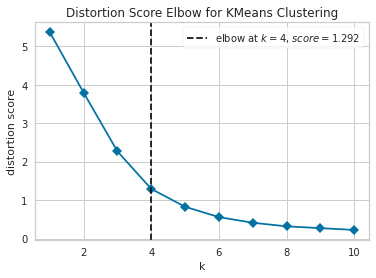

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
# Elbow Method for K means
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(data_scaled)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

Elbow method helps us decide the clusters for our data are 4. 

In [10]:
#Transform the data
pca = PCA()
transform = pca.fit_transform(data_scaled)
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(transform)
 
label

array([0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 3, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int32)

In [11]:
data={'Name':COMPANY,'Cluster':label}
company_list_EB=pd.DataFrame(data)
company_list_EB

,Name,Cluster
0,ASKA PHARMA HOLDINGS,0
1,ASTELLAS PHARMA INC,0
2,BIOFERMIN PHARMA,0
3,CHUGAI PHARMA,0
4,DAIICHI SANKYO CO LTD,0
5,DAINIPPON SUMITOMO,0
6,DAITO PHARMA,1
7,EIKEN CHEMICAL CO LTD,2
8,EISAI CO LTD,0
9,FUJI PHARMA,1


 # <a href='#1'> # V. K-means Clusters: Silhouette Method </a>

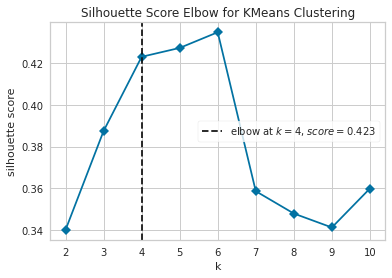

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [12]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,11),metric='silhouette', timings= False)
visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


In [13]:
#Transform the data
pca = PCA()
transform = pca.fit_transform(data_scaled)
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(transform)
 
label

array([0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 3, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int32)

In [14]:
data={'Name':COMPANY,'Cluster':label}
company_list_EB=pd.DataFrame(data)
company_list_EB

,Name,Cluster
0,ASKA PHARMA HOLDINGS,0
1,ASTELLAS PHARMA INC,0
2,BIOFERMIN PHARMA,0
3,CHUGAI PHARMA,0
4,DAIICHI SANKYO CO LTD,0
5,DAINIPPON SUMITOMO,0
6,DAITO PHARMA,1
7,EIKEN CHEMICAL CO LTD,2
8,EISAI CO LTD,0
9,FUJI PHARMA,1


 # <a href='#1'> # VI. Agglomerative Hierarchical Clustering Algorithm: </a>

In agglomerative clustering, the cluster formation starts with individual points. Each point is considered as one cluster.

Let’s say there are N data points. In the beginning, there will be N clusters.

Then, the distance between each pair of cluster is found and the clusters closest to each other is matched and made as one cluster. This would result in (N – 1) cluster.

In the next step, the distance between pair of clusters are found and the clusters closest to each other is matched and made as one cluster.

This would result in (N – 2) clusters. The same process is repeated until all the data points are merged into one cluster. e.g., root cluster.



Here, we can see that the scale of all the variables is almost similar. Now, we are good to go. Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem:

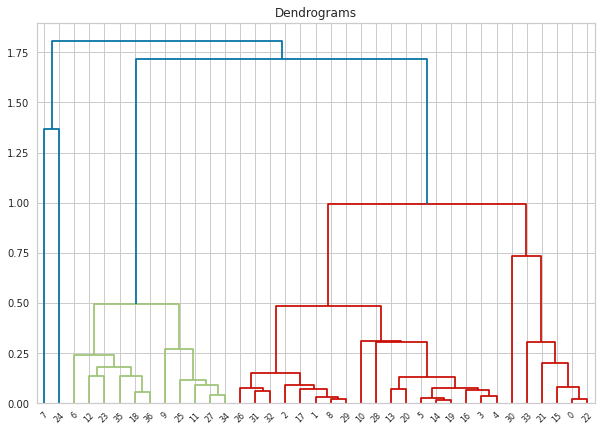

In [15]:

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))


###  Now we decide the number of clusters: 

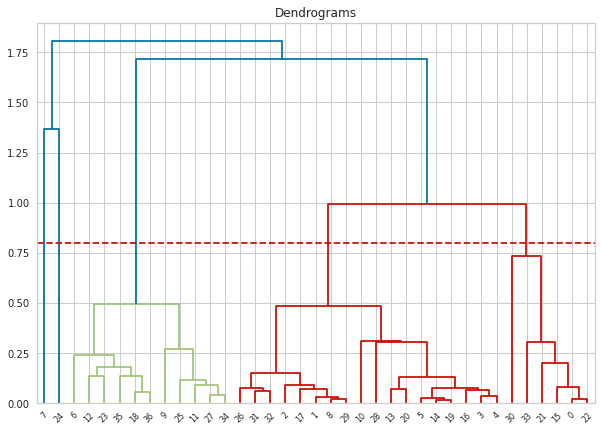

In [16]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.8, color='r', linestyle='--')

the line cuts through the graph at 6 points so the number of clusters are 6

In [17]:

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters= 5 , affinity='euclidean', linkage='ward')  
label= cluster.fit_predict(data_scaled)
label

array([0, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0,
       0, 2, 4, 2, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2])

In [18]:
data={'Name':COMPANY,'Cluster':label}
company_list_AHC=pd.DataFrame(data)
company_list_AHC

,Name,Cluster
0,ASKA PHARMA HOLDINGS,0
1,ASTELLAS PHARMA INC,1
2,BIOFERMIN PHARMA,1
3,CHUGAI PHARMA,1
4,DAIICHI SANKYO CO LTD,1
5,DAINIPPON SUMITOMO,1
6,DAITO PHARMA,2
7,EIKEN CHEMICAL CO LTD,3
8,EISAI CO LTD,1
9,FUJI PHARMA,2


 # <a href='#1'> # VII.DBSCAN clustering algorithm: </a>

DBSCAN stands for density-based spatial clustering of applications with noise. It's a density-based clustering algorithm, unlike k-means.

DBSCAN is a density-based clustering algorithm that assumes that clusters are dense regions in space that are separated by regions having a lower density of data points. Here, the ‘densely grouped’ data points are combined into one cluster. We can identify clusters in large datasets by observing the local density of data points.

Before we apply the DBSCAN model, first, we need to obtain its two parameters.

MinPoints: We can obtain the minimum number of Points to be used to recognize a cluster, as follows:

If the dataset has two dimensions, use the min sample per cluster as 4.

If the data has more than two dimensions, the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension
Since our data is two-dimensional, we shall use the default value of 4 as our MinPoint parameter.

Epsilon (Eps): To calculate the value of Eps, we shall calculate the distance between each data point to its closest neighbor using the Nearest Neighbours. After that, we sort them and finally plot them. From the plot, we identify the maximum value at the curvature of the graph. This value is our Eps.

### Finding the Optimal value of Epsilon

Text(0, 0.5, 'Distance')

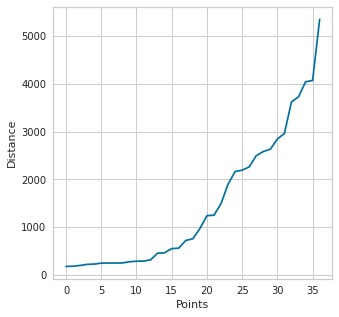

In [19]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df)

distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

We could decide the eps number is 3900

### Implementing the DBSCAN model

In [20]:
dbscan_cluster = DBSCAN(eps= 4000, min_samples= 8)
dbscan_cluster.fit(df)
# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 1


From the sugesstion of DBSCAN model, there is only one cluster of our sample. It doesn't bring any insight for the objective.

The most exciting feature of DBSCAN clustering is that it is robust to outliers, since our data sample is pretty small and simple without outliers. Therefore DBSCAN is not the optimal clusterning algorithm for our sample.



 # <a href='#1'> # VIII. Gaussian Mixture Model (GMM):</a>

Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

Let’s say we have three Gaussian distributions (more on that in the next section) – GD1, GD2, and GD3. These have a certain mean (μ1, μ2, μ3) and variance (σ1, σ2, σ3) value respectively. For a given set of data points, our GMM would identify the probability of each data point belonging to each of these distributions

Gaussian Mixture Models are probabilistic models and use the soft clustering approach for distributing the points in different clusters. 

https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/#h2_7

In [21]:
gmm = GaussianMixture(n_components=5)
gmm.fit(data_scaled)

labels = gmm.predict(data_scaled)
labels

array([4, 1, 1, 1, 1, 1, 0, 3, 1, 0, 1, 0, 0, 1, 1, 4, 1, 1, 0, 1, 1, 4,
       4, 0, 2, 0, 1, 0, 1, 1, 4, 1, 1, 4, 0, 0, 0])

In [22]:
data={'Name':COMPANY,'Cluster':label}
company_list_GMM=pd.DataFrame(data)
company_list_GMM

,Name,Cluster
0,ASKA PHARMA HOLDINGS,0
1,ASTELLAS PHARMA INC,1
2,BIOFERMIN PHARMA,1
3,CHUGAI PHARMA,1
4,DAIICHI SANKYO CO LTD,1
5,DAINIPPON SUMITOMO,1
6,DAITO PHARMA,2
7,EIKEN CHEMICAL CO LTD,3
8,EISAI CO LTD,1
9,FUJI PHARMA,2


# Conclusion:

Through this project, we use different clustering algorithm to group 37 pharmaceutical companies to different clusters based on their technology similarity.

In the result, 37 companies are grouped into 4 clusters. 